In [23]:
import numpy as np
import matplotlib.pyplot as plt
from fits_library import linear_fit
from scipy.optimize import curve_fit

$$\text{Part A: Calibration}$$

In [24]:
#PT100
#Attach ground wire to the 2 blue ones. Other one to the remaining using crocodile wires. 
#Immerse the mercury thermometer (used as reference) into the ice. 
#also immerse the pt100. Then heat and measure temperature. 

temperature_day1 = np.array([4, 7, 8, 10, 12, 14, 16, 18, 20, 22, 24, 28, 
                              30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 
                              70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]) #0.2 C

length_alcohol = np.array([11.5, 11.5, 11.5, 11.6, 11.6, 11.8, 12.1, 12.3, 12.5, 12.7, 13, 13.5, 13.8, 14, 14.3, 14.5, 14.7, 15, 15.2, 15.5, 15.7, 16, 
                                16.3, 16.5, 16.7, 17, 17.2, 17.4, 17.7, 17.9, 18.1, 18.4, 18.6, 18.8, 19.1, 19.4, 
                                19.5, 19.9, 20.1, 20.3, 20.6, 21, 21.4, 21.5, 21.8, 22.2, 22.6, 22.9]) #in cm

resistance_pt100 = np.array([107.8, 108.2, 110.2, 111.2, 111.3, 111.8, 112.4, 113.3, 114.2, 115.7, 116.4, 117.2, 
                             118.6, 119, 119.5, 120.1, 121, 122.1, 123.5, 124.1, 124.8, 125.5, 126.2, 127, 127.6, 128.5, 
                             129.1, 129.9, 130.5, 131.1, 131.7, 132.4, 133.2, 133.8, 134.6, 135.1, 136, 136.6, 137, 137.7, 138.5, 
                             139.3, 139.7, 140.6, 141.1, 142.3, 143.9, 144.3])

#7 onwards no 20

temperature_day2 = np.array([7, 8, 10, 12, 14, 16, 18, 22, 24, 28, 
                              30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 
                              70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]) 

voltage_thermocouple = np.array([0.3, 0.3, 0.5, 0.5, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 
                                 1.6, 1.7, 1.7, 1.8, 1.9, 2, 2, 2.1, 2.2, 2.2, 2.3, 2.4, 2.5, 2.6, 
                                 2.7, 2.8, 2.8, 2.9, 3, 3.1, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 4])

resistance_thermistor = np.array([2.02, 1.99, 1.93, 1.89, 1.86, 1.85, 1.72, 1.31, 1.23, 1.14, 1.08, 0.98, 
                                  0.93, 0.81, 0.76, 0.72, 0.66, 0.63, 0.58, 0.56, 0.51, 0.48, 0.45, 0.43, 0.40, 0.38, 
                                  0.36, 0.34, 0.31, 0.28, 0.27, 0.25, 0.23, 0.22, 0.21, 0.2, 0.19, 0.18, 0.17, 0.16,
                                0.15, 0.14, 0.13, 0.13, 0.13, 0.12])

temperature_day3 = np.array([8, 10, 12, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 
                             50, 52, 54, 56, 58, 60, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 
                             96, 98, 100]) + 273.15

resistance_thermistor2 = np.array([3.44, 3.22, 2.65, 2.02, 1.82, 1.41, 1.31, 1.21, 1.11, 1.03, 0.91, 
                                   0.85, 0.78, 0.72, 0.67, 0.63, 0.59, 0.57, 0.51, 0.47, 0.45, 0.43, 0.4, 0.37, 
                                   0.34, 0.30, 0.28, 0.27, 0.25, 0.23, 0.22, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 
                                   0.14, 0.13, 0.12, 0.12, 0.11, 0.1, 0.1])

0.12196621033537505 10.19748440258018


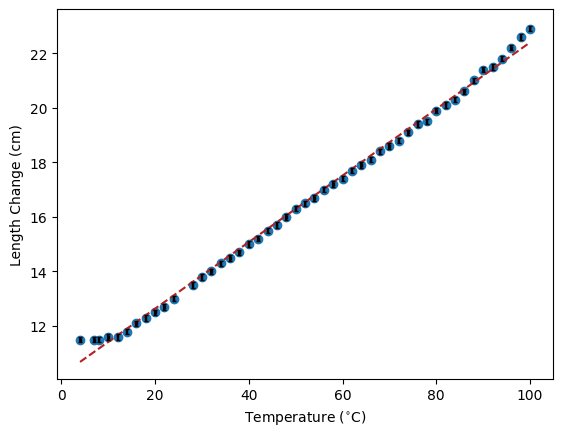

In [25]:
#alcohol thermometer
slope_alcohol, intercept_alcohol, slope_alcohol_err, intercept_alcohol_err = linear_fit(temperature_day1, length_alcohol)
alcohol_fit = slope_alcohol * temperature_day1 + intercept_alcohol

print(slope_alcohol, intercept_alcohol)

plt.scatter(temperature_day1, length_alcohol)
plt.plot(temperature_day1, alcohol_fit, '--', color = 'firebrick')
plt.errorbar(temperature_day1, length_alcohol, xerr = 0.1, yerr = 0.1, capsize = 1.5, color = 'k', ls = 'none')

plt.xlabel(r"Temperature ($^{\circ}$C)")
plt.ylabel("Length Change (cm)")
plt.savefig("alcoholCalibration.png")
plt.show()

Fitted A: 3.276491146770003
Fitted B: 0.2484432339324116
Fitted C: 0.0021130568123103846


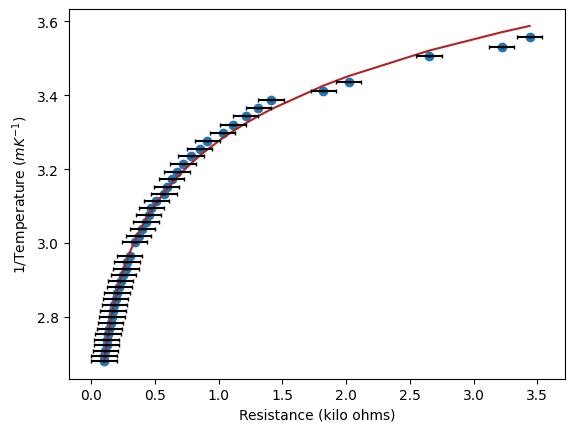

In [26]:
# Define the function you want to fit
T_inverse = 1/temperature_day3 * 1000

def model(R, a, b, c):
    return a + b * (np.log(R)) + c * (np.log(R)) ** 3

# Use curve_fit to fit the data
params, covariance = curve_fit(model, resistance_thermistor2, T_inverse)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Print the fitted parameters
print(f"Fitted A: {a_fit}")
print(f"Fitted B: {b_fit}")
print(f"Fitted C: {c_fit}")

#error analysis for thermistor calibration

dR = 0.1 #ohms
dT = 100/(temperature_day3 ** 2 )

# Plot the original data and the fitted curve
plt.scatter(resistance_thermistor2, T_inverse)
plt.plot(resistance_thermistor2, model(resistance_thermistor2, a_fit, b_fit, c_fit), color='firebrick')
plt.errorbar(resistance_thermistor2, T_inverse, xerr = dR, yerr = 0, ls = 'none', color = 'k', capsize = 1.5)
plt.xlabel('Resistance (kilo ohms)')
plt.ylabel(r'1/Temperature ($mK^{-1}$)')
plt.savefig("thermistorCalibration.png")
plt.show()

0.37063211238276494 107.09364959288091


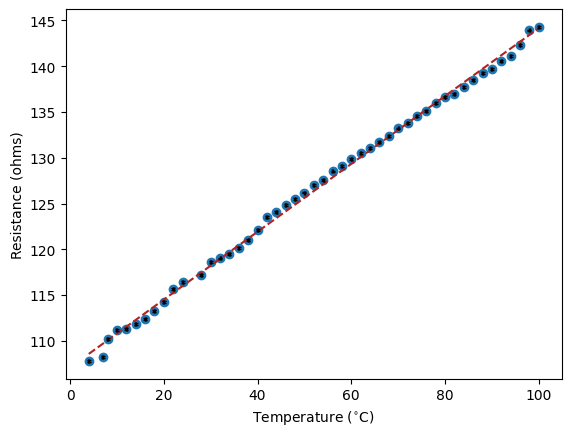

In [27]:
#Pt100
slope_pt100, intercept_pt100, slope_pt100_err, intercept_pt100_err = linear_fit(temperature_day1, resistance_pt100)
pt_100_fit = slope_pt100 * temperature_day1 + intercept_pt100

print(slope_pt100, intercept_pt100)

plt.scatter(temperature_day1, resistance_pt100)
plt.plot(temperature_day1, pt_100_fit, '--', color = 'firebrick')
plt.errorbar(temperature_day1, resistance_pt100, xerr = 0.1, yerr = 0.1, capsize = 1.5, color = 'k', ls = 'none')

plt.xlabel(r"Temperature ($^{\circ}$C)")
plt.ylabel("Resistance (ohms)")
plt.savefig("pt100calibration.png")
plt.show()

0.04008610554821343 -0.040764734021421146


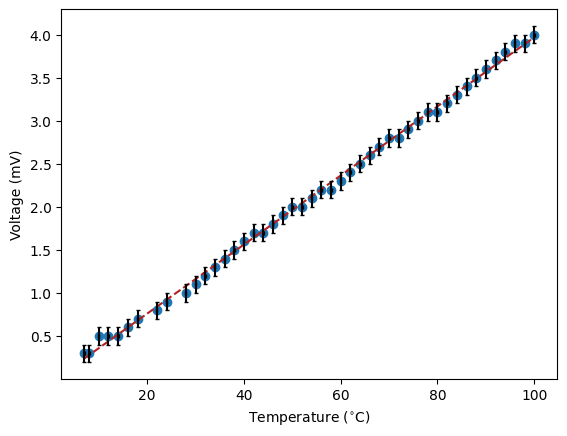

In [28]:
#thermocouple

slope_thermocouple, intercept_thermocouple, slope_thermocouple_err, intercept_thermocouple_err = linear_fit(temperature_day2, voltage_thermocouple)
thermocouple_fit = slope_thermocouple * temperature_day2 + intercept_thermocouple

print(slope_thermocouple, intercept_thermocouple)

plt.scatter(temperature_day2, voltage_thermocouple)
plt.plot(temperature_day2, thermocouple_fit, '--', color = 'firebrick')
plt.errorbar(temperature_day2, voltage_thermocouple, xerr = 0.1, yerr = 0.1, capsize = 1.5, color = 'k', ls = 'none')

plt.xlabel(r"Temperature ($^{\circ}$C)")
plt.ylabel("Voltage (mV)")
plt.savefig("thermocouplecalibration.png")
plt.show()

$$\text{Part B: Melting point of Unknown Solid}$$

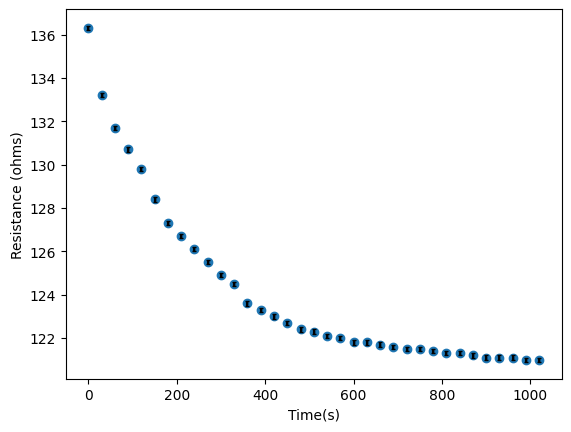

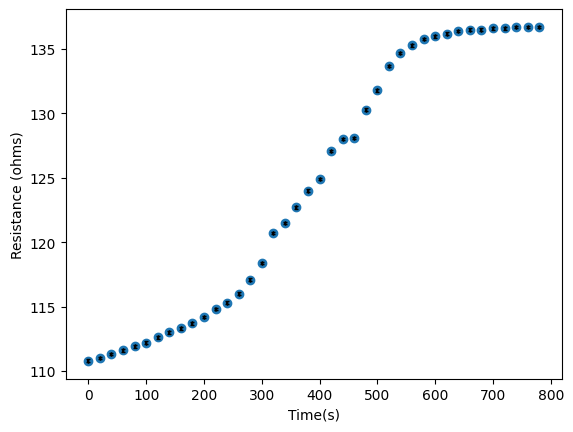

78.80145683911131 79.88069413840631


In [29]:
#melting point using Pt100

resistance_heating = np.array([110.8, 111, 111.3, 111.6, 111.9, 112.2, 112.6, 113, 113.3, 113.7, 
                               114.2, 114.8, 115.3, 116, 117.1, 118.4, 120.7, 121.5, 122.7, 124, 124.9,
                               127.1, 128, 128.1, 130.3, 131.8, 133.7, 134.7, 135.3, 135.8, 136, 136.2, 136.4, 
                               136.5, 136.5, 136.6, 136.6, 136.7, 136.7, 136.7])

resistance_cooling = np.array([136.3, 133.2, 131.7, 130.7, 129.8, 128.4, 127.3, 126.7, 126.1, 125.5, 
                               124.9, 124.5, 123.6, 123.3, 123, 122.7, 122.4, 122.3, 122.1, 122, 121.8, 
                               121.8, 121.7, 121.6, 121.5, 121.5, 121.4, 121.3, 121.3, 121.2, 121.1, 121.1,
                               121.1, 121.0, 121])


time_cooling = np.arange(0, len(resistance_cooling) * 30, 30)
time_heating = np.arange(0, len(resistance_heating) * 20, 20)

plt.scatter(time_cooling, resistance_cooling)
plt.errorbar(time_cooling, resistance_cooling, xerr = 0.01, yerr = 0.1, color = 'k', capsize = 1.5, ls = 'none')
plt.xlabel("Time(s)")
plt.ylabel("Resistance (ohms)")
plt.savefig("coolingcurve.png")
plt.show()
plt.scatter(time_heating, resistance_heating)
plt.errorbar(time_heating, resistance_heating, xerr = 0.01, yerr = 0.1, color = 'k', capsize = 1.5, ls = 'none')
plt.xlabel("Time(s)")
plt.ylabel("Resistance (ohms)")
plt.savefig("heatingcurve.png")
plt.show()

print((resistance_cooling[0] - intercept_pt100)/slope_pt100, (resistance_heating[len(resistance_heating) - 1] - intercept_pt100)/slope_pt100)

$$\text{Part C: Newton's law of cooling}$$
Take the same amount of water in different sized beakers. Heat the water till it starts steaming then at regualar intervals of time 
noted down teh resistance reading till the water cools down. Plot the curves/ Do this for 4 different beakers. Use Pt100

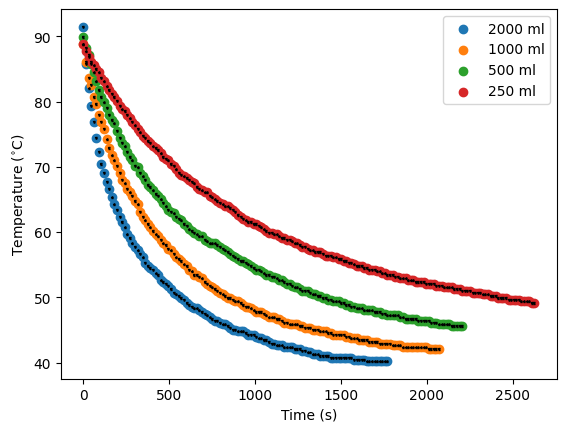

In [42]:
#2000ml beaker
time_2L = np.arange(0, 15 * 119, 15)

resistance_2L = np.array([141, 138.9, 137.5, 136.5, 135.6, 134.7, 133.9, 133.2, 132.7, 132.2, 131.8, 131.3, 130.9, 130.6, 
                          130.2, 129.9, 129.6, 129.2, 129, 128.7, 128.5, 128.3, 128.1, 127.9, 127.6, 127.4, 127.3, 
                          127.2, 127, 126.9, 126.6, 126.5, 126.4, 126.3, 126.1, 125.9, 125.8, 125.7, 125.6, 
                          125.5, 125.3, 125.2, 125.1, 125, 125, 124.9, 124.8, 124.7, 124.6, 124.5, 124.4, 124.3, 
                          124.3, 124.2, 124.1, 124.1, 124, 123.9, 123.8, 123.8, 123.7, 123.7, 123.7, 123.6, 123.5, 123.5, 
                          123.5, 123.4, 123.3, 123.3, 123.2, 123.2, 123.1, 123, 123, 122.9, 122.9, 122.9, 122.8, 122.8, 
                          122.8, 122.8, 122.7, 122.7, 122.7, 122.6, 122.6, 122.5, 122.5, 122.4, 122.4, 122.4, 122.3, 122.3, 122.3, 
                          122.3, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.2, 122.1, 122.1, 122.1, 
                          122.1, 122.1, 122, 122, 122, 122, 122, 122, 122, 122, 122])

#1000 ml beaker
resistance_1L = np.array([140.0, 139.0, 138.1, 137.7, 137.0, 136.6, 136.0, 135.6, 135.2,
                            134.6, 134.1, 133.7, 133.4, 133.1, 132.7, 132.3, 132.1, 131.8,
                            131.6, 131.4, 131.1, 130.9, 130.5, 130.2, 130.0, 129.8, 129.6,
                            129.4, 129.2, 129.1, 128.9, 128.7, 128.6, 128.4, 128.3, 128.1,
                            127.9, 127.8, 127.7, 127.5, 127.4, 127.2, 127.1, 126.9, 126.9,
                            126.8, 126.7, 126.5, 126.4, 126.3, 126.2, 126.1, 126.0, 125.9,
                            125.8, 125.7, 125.6, 125.6, 125.5, 125.4, 125.4, 125.3, 125.2,
                            125.1, 125.1, 125.0, 124.9, 124.8, 124.8, 124.8, 124.7, 124.6,
                            124.5, 124.5, 124.5, 124.4, 124.4, 124.3, 124.2, 124.2, 124.1,
                            124.1, 124.1, 124.1, 124.0, 124.0, 123.9, 123.9, 123.9, 123.8,
                            123.8, 123.8, 123.7, 123.7, 123.7, 123.6, 123.6, 123.5, 123.5,
                            123.5, 123.5, 123.5, 123.4, 123.4, 123.3, 123.3, 123.3, 123.2,
                            123.2, 123.2, 123.2, 123.1, 123.1, 123.1, 123.1, 123.0, 123.0,
                            123.0, 123.0, 123.0, 122.9, 122.9, 122.9, 122.9, 122.8, 122.8,
                            122.8, 122.8, 122.8, 122.8, 122.8, 122.8, 122.8, 122.8, 122.7,
                            122.7, 122.7, 122.7, 122.7])

time_1L = np.arange(0, 15 * len(resistance_1L), 15)

#500 ml beaker

resistance_500ml = np.array([133.4, 132.8, 132.4, 131.9, 131.4, 130.9, 130.4, 130, 129.7, 129.4, 129, 128.7, 128.5, 128.1, 127.7, 127.4, 
                             127.2, 126.9, 126.6, 126.4, 126.1, 126, 125.7, 125.5, 125.3, 125, 124.9, 124.7, 124.5, 124.4, 124.2, 
                             124, 123.8, 123.6, 123.5, 123.4, 123.2, 123.1, 123, 122.8, 122.7, 122.5, 122.4, 122.3, 122.2, 
                             122.1, 122.1, 121.9, 121.8, 121.7, 121.7, 121.7, 121.6, 121.5, 121.4, 121.3, 121.2, 121.1, 121, 120.9, 
                             120.8, 120.7, 120.7, 120.6, 120.5, 120.4, 120.3, 120.2, 120.2, 120.1, 120, 119.9, 
                             119.9, 119.8, 119.8, 119.7, 119.6, 119.6, 119.5, 119.4, 119.4, 119.3, 119.2, 119.2, 119.1, 
                             119, 119, 119, 118.9, 118.8, 118.8, 118.7, 118.7, 118.6, 118.6, 118.5, 118.5, 118.4, 118.4,
                             118.4, 118.3, 118.3, 118.2, 118.2, 118.1, 118.1, 118, 118, 118, 117.9, 117.9, 117.9, 
                             117.9, 117.8, 117.8, 117.8, 117.7, 117.7, 117.6, 117.6, 117.6, 117.6, 117.6, 117.5, 117.5, 117.4, 
                             117.4, 117.4, 117.4, 117.4, 117.3, 117.3, 117.3, 117.3, 117.3, 117.2, 117.2, 117.2, 117.1, 117.1,
                             117.1, 117.1, 117.1, 117, 117, 117, 117, 117]) + 7

time_500ml = np.arange(0, len(resistance_500ml) * 15, 15)

#250ml beaker

resistance_250ml = np.array([131.0, 130.6, 130.3, 130.0, 129.8, 129.6, 129.4, 129.1, 128.9, 
                            128.6, 128.4, 128.2, 128.0, 127.8, 127.5, 127.3, 127.2, 127.0, 126.8,
                            126.6, 126.4, 126.2, 126.0, 125.8, 125.7, 125.5, 125.4, 125.2, 125.1, 
                            125.0, 124.8, 124.6, 124.5, 124.4, 124.2, 124.1, 123.9, 123.7, 123.6, 
                            123.5, 123.4, 123.3, 123.2, 123.1, 122.9, 122.8, 122.7, 122.6, 122.6, 122.4, 
                            122.3, 122.2, 122.1, 122.0, 121.9, 121.8, 121.8, 121.7, 121.6, 121.5, 
                            121.3, 121.2, 121.1, 121.0, 120.9, 120.9, 120.8, 120.8, 120.7, 120.6,
                            120.5, 120.4, 120.3, 120.3, 120.2, 120.2, 120.1, 120.0, 120.0, 119.9, 119.9,
                            119.8, 119.7, 119.7, 119.6, 119.5, 119.5, 119.4, 119.3, 119.3,
                            119.2, 119.2, 119.2, 119.1, 119.0, 119.0, 119.0, 118.9, 118.9, 118.8,
                            118.8, 118.7, 118.7, 118.6, 118.6, 118.5, 118.4, 118.4, 118.4, 118.3,
                            118.3, 118.2, 118.2, 118.2, 118.1, 118.1, 118.0, 118.0, 117.9, 117.9, 
                            117.9, 117.8, 117.8, 117.7, 117.7, 117.7, 117.6, 117.6, 117.6, 117.5, 117.5, 
                            117.5, 117.5, 117.4, 117.4, 117.4, 117.4, 117.3, 117.3, 117.3, 117.2, 117.2, 117.2, 
                            117.2, 117.1, 117.1, 117.1, 117.0, 117.0, 117.0, 117.0, 116.9, 116.9, 116.9, 116.9, 116.8,
                            116.8, 116.8, 116.7, 116.7, 116.7, 116.6, 116.6, 116.6, 116.6, 116.5,
                            116.5, 116.5, 116.5, 116.5, 116.4, 116.4, 116.4, 116.4, 116.3, 116.3])+ 9

time_250 = np.arange(0, 15 * len(resistance_250ml), 15)

temp_2T = (resistance_2L - intercept_pt100) / slope_pt100
temp_1T = (resistance_1L - intercept_pt100) / slope_pt100
temp_500T = (resistance_500ml - intercept_pt100) / slope_pt100
temp_250T = (resistance_250ml - intercept_pt100) / slope_pt100

#error analysis for calculating the temperature

d_temp2T = temp_2T * np.sqrt((dR/resistance_2L) ** 2 + slope_pt100_err ** 2 + intercept_pt100_err ** 2)
d_temp1T = temp_1T * np.sqrt((dR/resistance_1L) ** 2 + slope_pt100_err ** 2 + intercept_pt100_err ** 2)
d_temp500T = temp_500T * np.sqrt((dR/resistance_500ml) ** 2 + slope_pt100_err ** 2 + intercept_pt100_err ** 2)
d_temp250T = temp_250T * np.sqrt((dR/resistance_250ml) ** 2 + slope_pt100_err ** 2 + intercept_pt100_err ** 2)


cooling_xerr = 0.01
cooling_yerr = 0.1

plt.errorbar(time_2L, temp_2T, xerr = cooling_xerr, yerr = cooling_yerr, capsize = 1, color = 'k', ls = 'none')
plt.scatter(time_2L, temp_2T, label = '2000 ml')

plt.scatter(time_1L, temp_1T, label = '1000 ml')
plt.errorbar(time_1L, temp_1T, xerr = cooling_xerr, yerr = cooling_yerr, capsize = 1, color = 'k', ls = 'none')

plt.scatter(time_500ml, temp_500T, label = '500 ml')
plt.errorbar(time_500ml, temp_500T, xerr = cooling_xerr, yerr = cooling_yerr, capsize = 1, color = 'k', ls = 'none')

plt.scatter(time_250, temp_250T, label = '250 ml')
plt.errorbar(time_250, temp_250T, xerr = cooling_xerr, yerr = cooling_yerr, capsize = 1, color = 'k', ls = 'none')


plt.legend()
plt.xlabel("Time (s)")
plt.ylabel(r"Temperature ($^{\circ}$C)")
plt.savefig("NewtonsCooling_temp.png")
plt.show()

$$\text{Part D: Heat Transfer Coeffecient}$$

In [31]:
#heat transfer coefficient plot ln((T - Ts) / (T0 - Ts)). T0 = 141 resistance of Pt100. Ts = 25.6 C

#Radiii of beakers
#2000ml: 132.28 mm
#1000ml: 106.2 mm
#500ml: 82.82 mm 
#250ml: 69.48 mm 

radii_beakers = np.array([132.28, 106.2, 82.82, 69.48]) / 2000 #m

area = np.pi * radii_beakers ** 2 #m2

mass = 0.1 #kg
specific_heat = 4181 #JK-1kg-1

T0 = np.array([(resistance_2L[0] - intercept_pt100) / slope_pt100, (resistance_1L[0] - intercept_pt100) / slope_pt100, 
               (resistance_500ml[0] - intercept_pt100) / slope_pt100, (resistance_250ml[0] - intercept_pt100) / slope_pt100])
Ts = 25.6

temp_2T = (resistance_2L - intercept_pt100) / slope_pt100
temp_1T = (resistance_1L - intercept_pt100) / slope_pt100
temp_500T = (resistance_500ml - intercept_pt100) / slope_pt100
temp_250T = (resistance_250ml - intercept_pt100) / slope_pt100

T1 = np.log((temp_2T - Ts) / (T0[0] - Ts))
T2 = np.log((temp_1T - Ts) / (T0[1] - Ts))
T3 = np.log((temp_500T - Ts) / (T0[2] - Ts))
T4 = np.log((temp_250T - Ts) / (T0[3] - Ts))


21.07553782076484 0.0004785535169153871


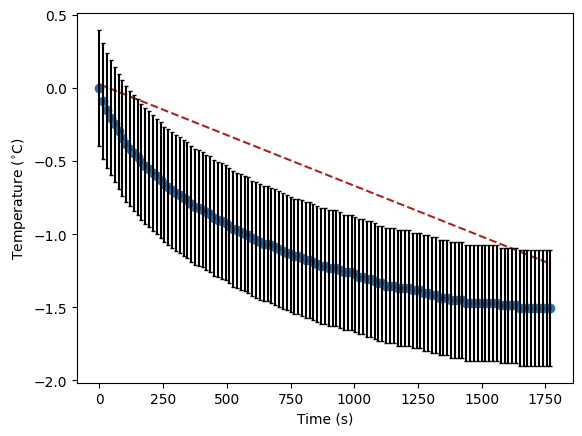

27.01937636369564 0.0004242100166679837


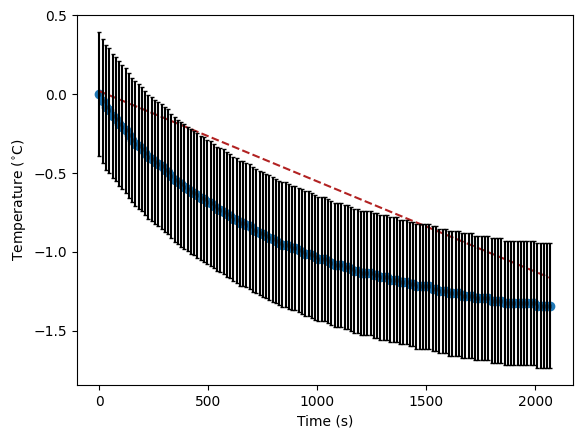

37.3243209956563 0.00037591093762455663


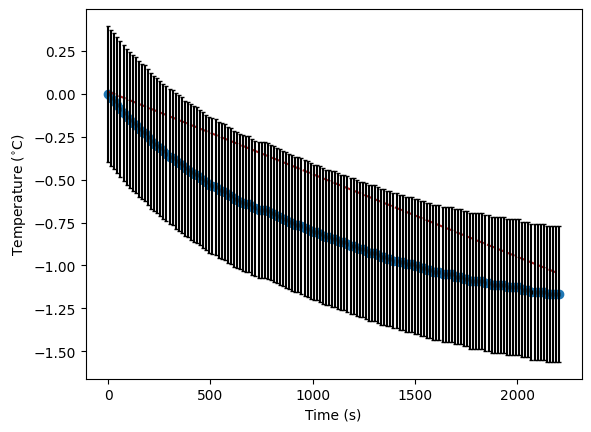

38.93608962068257 0.00022360427218040362


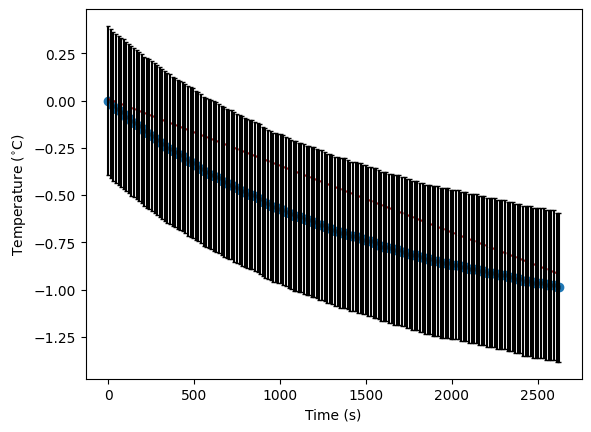

In [32]:
dt = 0.01


slopeT1, interceptT1, slope_errT1, intercept_errT1 = linear_fit(time_2L, T1)
fitT1 = slopeT1 * time_2L + intercept_errT1
heat_coeff1 = -(mass * specific_heat * slopeT1) / area[0]
dT1 = np.sqrt((dR/resistance_2L) ** 2 + slope_pt100_err ** 2 + intercept_pt100_err)
print(heat_coeff1, heat_coeff1 * slope_errT1)
plt.scatter(time_2L, T1)
plt.plot(time_2L, fitT1, '--', color = 'firebrick')
plt.errorbar(time_2L, T1, xerr = dt, yerr = dT1, capsize = 1.5, ls = 'none', color = 'k')
plt.xlabel("Time (s)")
plt.ylabel(r"Temperature ($^{\circ}$C)")
plt.savefig("2000ml_heatcoeff.png")
plt.show()

slopeT2, interceptT2, slope_errT2, intercept_errT2 = linear_fit(time_1L, T2)
fitT2 = slopeT2 * time_1L + intercept_errT2
heat_coeff2 = -(mass * specific_heat * slopeT2) / area[1]
dT2 =np.sqrt((dR/resistance_1L) ** 2 + slope_pt100_err ** 2 + intercept_pt100_err)
print(heat_coeff2, heat_coeff2 * slope_errT2)
plt.scatter(time_1L, T2)
plt.plot(time_1L, fitT2, '--', color = 'firebrick')
plt.errorbar(time_1L, T2, xerr = dt, yerr = dT2, capsize = 1.5, ls = 'none', color = 'k')
plt.xlabel("Time (s)")
plt.ylabel(r"Temperature ($^{\circ}$C)")
plt.savefig("1000ml_heatcoeff.png")
plt.show()

slopeT3, interceptT3, slope_errT3, intercept_errT3 = linear_fit(time_500ml, T3)
fitT3 = slopeT3 * time_500ml + intercept_errT3
heat_coeff3 = -(mass * specific_heat * slopeT3) / area[2]
dT3 = np.sqrt((dR/resistance_500ml) ** 2 + slope_pt100_err ** 2 + intercept_pt100_err)
print(heat_coeff3, heat_coeff3 * slope_errT3)
plt.scatter(time_500ml, T3)
plt.plot(time_500ml, fitT3, '--', color = 'firebrick')
plt.errorbar(time_500ml, T3, xerr = dt, yerr = dT3, capsize = 1.5, ls = 'none', color = 'k')
plt.xlabel("Time (s)")
plt.ylabel(r"Temperature ($^{\circ}$C)")
plt.savefig("500ml_heatcoeff.png")
plt.show()

slopeT4, interceptT4, slope_errT4, intercept_errT4 = linear_fit(time_250, T4)
fitT4 = slopeT4 * time_250 + intercept_errT4
heat_coeff4 = -(mass * specific_heat * slopeT4) / area[3]
dT4 = np.sqrt((dR/resistance_250ml) ** 2 + slope_pt100_err ** 2 + intercept_pt100_err)
print(heat_coeff4, heat_coeff4 * slope_errT4)
plt.scatter(time_250, T4)
plt.plot(time_250, fitT4, '--', color = 'firebrick')
plt.errorbar(time_250, T4, xerr = dt, yerr = dT4, capsize = 1.5, ls = 'none', color = 'k')
plt.xlabel("Time (s)")
plt.ylabel(r"Temperature ($^{\circ}$C)")
plt.savefig("250ml_heatcoeff.png")
plt.show()

In [39]:
Ts, T0[3] - Ts, specific_heat, mass, area[3]

(25.6, 63.18440185759062, 4181, 0.1, 0.0037914863860155448)

Fitted heat coefficient: [44.02466601]
Fitted heat coefficient: [46.52210017]
Fitted heat coefficient: [56.62248823]
Fitted heat coefficient: [52.79791433]


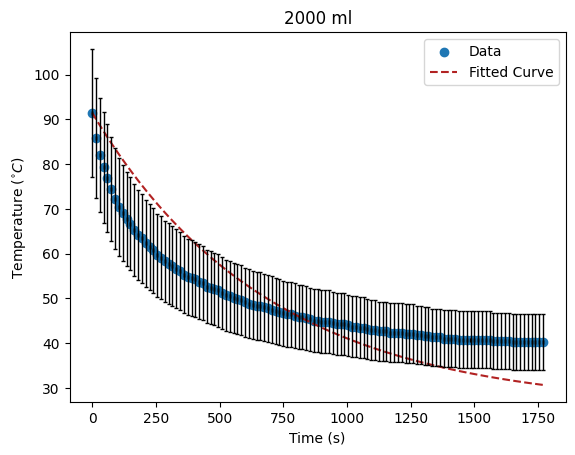

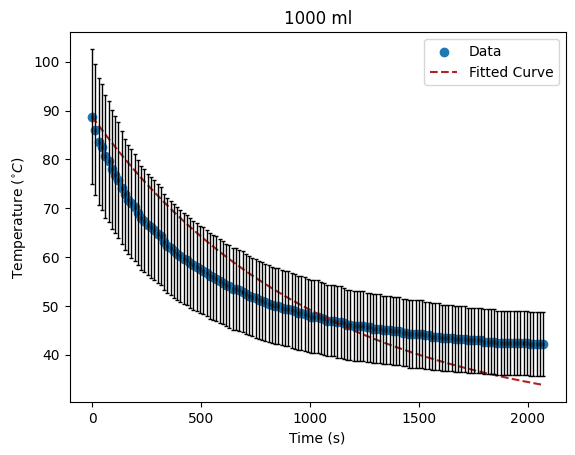

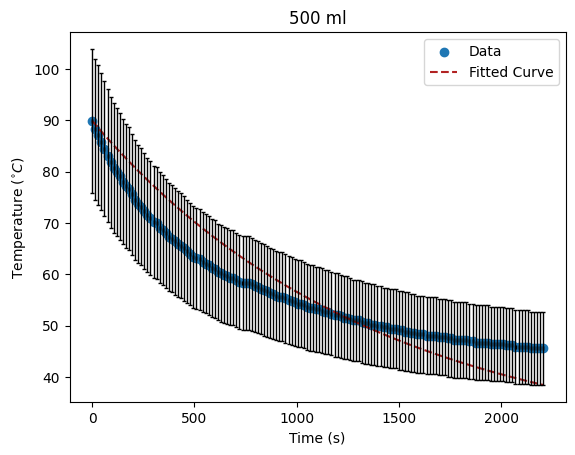

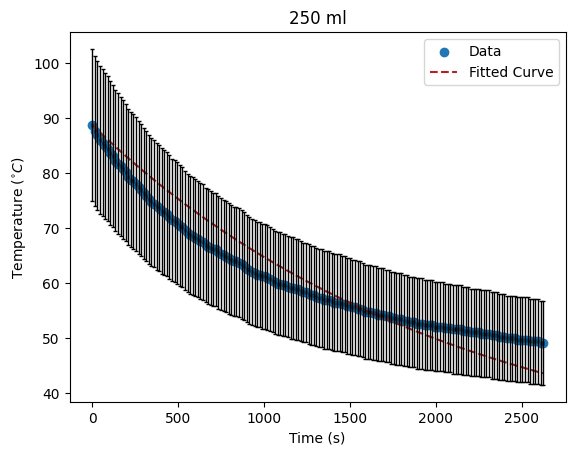

In [48]:
# Define the function you want to fit

def model1(t, h1):
    return 25.6 +  65.88249510582827 * np.exp(-(h1 * 0.013742895806491491)/(0.1 * 4181) * t)

# Use curve_fit to fit the data
params1, covariance1 = curve_fit(model1, time_2L, temp_2T)

# Extract the fitted parameters
h1_fit = params1

def model2(t, h2):
    return 25.6 +  63.18440185759062 * np.exp(-(h2 * 0.008858066061988317)/(0.1 * 4181) * t)

# Use curve_fit to fit the data
params2, covariance2 = curve_fit(model2, time_1L, temp_1T)

# Extract the fitted parameters
h2_fit = params2

def model3(t, h3):
    return 25.6 +  64.26363915688569 * np.exp(-(h3 * 0.005387165697423198)/(0.1 * 4181) * t)

# Use curve_fit to fit the data
params3, covariance3 = curve_fit(model3, time_500ml, temp_500T)

# Extract the fitted parameters
h3_fit = params3

def model4(t, h4):
    return 25.6 +  63.18440185759062 * np.exp(-(h4 * 0.0037914863860155448)/(0.1 * 4181) * t)

# Use curve_fit to fit the data
params4, covariance4 = curve_fit(model4, time_250, temp_250T)

# Extract the fitted parameters
h4_fit = params4

# Print the fitted parameters
print(f"Fitted heat coefficient: {h1_fit}")
print(f"Fitted heat coefficient: {h2_fit}")
print(f"Fitted heat coefficient: {h3_fit}")
print(f"Fitted heat coefficient: {h4_fit}")


# Plot the original data and the fitted curve
plt.scatter(time_2L, temp_2T, label = 'Data')
plt.plot(time_2L, model1(time_2L, h1_fit), '--', color = 'firebrick', label = 'Fitted Curve')
plt.errorbar(time_2L, temp_2T, xerr = 0.01, yerr = d_temp2T, color = 'k', capsize = 1.5, ls = 'none', elinewidth=1)
plt.xlabel(r'Time (s)')
plt.ylabel(r'Temperature ($^{\circ}C$)')
plt.legend()
plt.title("2000 ml")
plt.savefig("2000ml_decayexp.png")
plt.show()

plt.scatter(time_1L, temp_1T, label = 'Data')
plt.plot(time_1L, model2(time_1L, h2_fit), '--', color = 'firebrick', label = 'Fitted Curve')
plt.errorbar(time_1L, temp_1T, xerr = 0.01, yerr = d_temp1T, color = 'k', capsize = 1.5, ls = 'none', elinewidth=1)
plt.xlabel(r'Time (s)')
plt.ylabel(r'Temperature ($^{\circ}C$)')
plt.legend()
plt.title("1000 ml")
plt.savefig("1000ml_decayexp.png")
plt.show()

plt.scatter(time_500ml, temp_500T, label = 'Data')
plt.plot(time_500ml, model3(time_500ml, h3_fit), '--', color = 'firebrick', label = 'Fitted Curve')
plt.errorbar(time_500ml, temp_500T, xerr = 0.01, yerr = d_temp500T, color = 'k', capsize = 1.5, ls = 'none', elinewidth=1)
plt.xlabel(r'Time (s)')
plt.ylabel(r'Temperature ($^{\circ}C$)')
plt.legend()
plt.title("500 ml")
plt.savefig("500ml_decayexp.png")
plt.show()

plt.scatter(time_250, temp_250T, label = 'Data')
plt.plot(time_250, model4(time_250, h4_fit), '--', color = 'firebrick', label = 'Fitted Curve')
plt.errorbar(time_250, temp_250T, xerr = 0.01, yerr = d_temp250T, color = 'k', capsize = 1.5, ls = 'none', elinewidth=1)
plt.xlabel(r'Time (s)')
plt.ylabel(r'Temperature ($^{\circ}C$)')
plt.legend()
plt.title("250 ml")
plt.savefig("250ml_decayexp.png")
plt.show()

In [53]:
np.sqrt(np.diag(covariance1))

array([1.48103868])

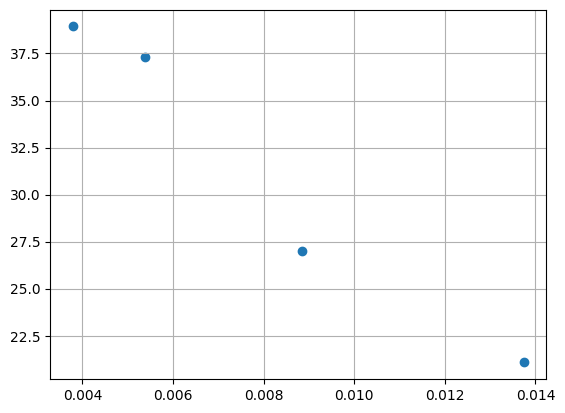

[0.0137429  0.00885807 0.00538717 0.00379149] 
 [21.07553782 27.01937636 37.324321   38.93608962]


In [ ]:
plt.scatter(area, np.array([heat_coeff1, heat_coeff2, heat_coeff3, heat_coeff4]))
plt.grid()
plt.show()
print(area, "\n", np.array([heat_coeff1, heat_coeff2, heat_coeff3, heat_coeff4]))

$$\text{Lee's Disc}$$

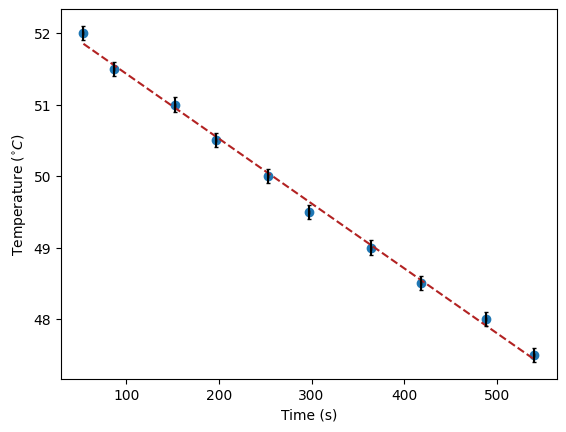

-0.009063130338227763 52.33546638097726


In [ ]:
#Lee's Disc

time_lee = np.array([53.58, 86.83, 152.96, 196.93, 252.5, 297.36, 364.53, 418.74, 488.59, 540.71])
temp_lee = np.arange(52, 47, -0.5)
slope, intercept, slope_err, intercept_err = linear_fit(time_lee, temp_lee)

fit_lees = slope * time_lee + intercept

plt.scatter(time_lee, temp_lee)
plt.plot(time_lee, fit_lees, '--', color = 'firebrick')
plt.errorbar(time_lee, temp_lee, xerr = 0.01, yerr = 0.1, color = 'k', capsize = 1.5, ls = 'none')
plt.xlabel("Time (s)")
plt.ylabel(r"Temperature ($^{\circ} C$)")
plt.savefig("leesdisccooling.png")
plt.show()
print(slope, intercept)

In [ ]:
M = 0.8; r = 36.1/1000; h = 23.1/1000; x = 5/1000; c = 375; delT = 321.95 - 319.55;

x1 = r + 2*h; x2 = 2 * (r + h)
A = np.pi * r ** 2 

k = (M * c * x * 0.009 * x1)/(A * delT * x2)

print(k)

0.9550066222604418


In [ ]:
#error in thermal conductivity 
M_err = 0.001/M; r_err = 0.02/(r * 2000); h_err = 0.02/(h * 2000); x_err = 0.02/(x * 2000);


delK = np.sqrt(M_err**2 + 4 * r_err ** 2 + h_err ** 2 + x_err ** 2)

delK * k

0.0023503326484028654